In [ ]:
##미세조정 전 pretrain 모델을 학습 하는 코드

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model,Sequential
import zipfile
from keras import optimizers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array


In [2]:
train_path = '/Users/bh/kears/iamge/train'

In [3]:
classes = 3
height = 128
width = 128
channels = 3

In [4]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/128, 
                                                                  validation_split=0.2,
                                                                  rotation_range=40,
                                                                  width_shift_range=0.2,
                                                                  height_shift_range=0.2,
                                                                  shear_range=0.2,
                                                                  zoom_range=0.2,
                                                                  horizontal_flip=True,
                                                                  vertical_flip=True,
                                                                  fill_mode='nearest')
                                                                 
image_data_train = image_generator.flow_from_directory(train_path,subset='training')
image_data_test = image_generator.flow_from_directory(train_path,subset='validation')

Found 1046 images belonging to 3 classes.
Found 259 images belonging to 3 classes.


In [5]:
## Data augument 한 사진 저장하기
#img = load_img('/Users/bh/adl.png')  
#x = img_to_array(img)  
#x = x.reshape((1,) + x.shape)  


#i = 0
#for batch in image_generator.flow(x, batch_size=1,
#                          save_to_dir='/Users/bh/adle aug' , save_prefix='adel', save_format='jpg'):
#    i += 1
#    if i > 20:
#        break 

In [6]:
resnet50 = tf.keras.applications.resnet50.ResNet50(
           include_top=False,
           weights='imagenet', ##이미지넷을 적용한 ResNet50 
           input_tensor=None,
           input_shape=(height,width,channels),
           pooling=None,
           classes=3,
)

In [7]:
resnet50.trainable=False ##모든 resnet50 학습을 얼린다.

In [8]:
model = Sequential([
                 resnet50,
                 Dense(512,activation='relu'),
                 BatchNormalization(),
                 GlobalAveragePooling2D(),
                 Dense(classes,activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 dense (Dense)               (None, 4, 4, 512)         1049088   
                                                                 
 batch_normalization (Batch  (None, 4, 4, 512)         2048      
 Normalization)                                                  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 24640387 (94.00 MB)
Trainable params: 1051

In [10]:
model.compile(optimizer=optimizers.legacy.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics='accuracy')
##콜백 함수로 fit에 넣어주면 학습중 학습률를 변경할 수 있다.
##사용하지 않음
#def scheduler(epoch, lr):
#    if epoch < 2:
#        return lr
#    else:
#        return lr * tf.math.exp(-0.1)
#lrs = tf.keras.callbacks.LearningRateScheduler(scheduler)
#model.fit(image_data_train,batch_size=32,epochs=5,callbacks=[lrs],validation_data=(image_data_test),
#          validation_steps =image_data_test.samples/image_data_test.batch_size)
hist = model.fit(image_data_train,batch_size=32,epochs=30,validation_data=(image_data_test),
          validation_steps =image_data_test.samples/image_data_test.batch_size)

Epoch 1/30
33/33 [==============================] - 18s 521ms/step - loss: 1.0734 - accuracy: 0.4226 - val_loss: 1.0594 - val_accuracy: 0.4170
Epoch 2/30
33/33 [==============================] - 16s 474ms/step - loss: 1.0161 - accuracy: 0.4876 - val_loss: 1.0451 - val_accuracy: 0.4286
Epoch 3/30
33/33 [==============================] - 16s 474ms/step - loss: 0.9920 - accuracy: 0.5134 - val_loss: 1.1163 - val_accuracy: 0.3977
Epoch 4/30
33/33 [==============================] - 16s 474ms/step - loss: 0.9760 - accuracy: 0.5191 - val_loss: 1.0913 - val_accuracy: 0.3745
Epoch 5/30
33/33 [==============================] - 16s 475ms/step - loss: 0.9505 - accuracy: 0.5421 - val_loss: 1.0305 - val_accuracy: 0.4324
Epoch 6/30
33/33 [==============================] - 16s 480ms/step - loss: 0.9282 - accuracy: 0.5430 - val_loss: 1.0167 - val_accuracy: 0.4286
Epoch 7/30
33/33 [==============================] - 16s 495ms/step - loss: 0.9362 - accuracy: 0.5507 - val_loss: 0.9930 - val_accuracy: 0.4942

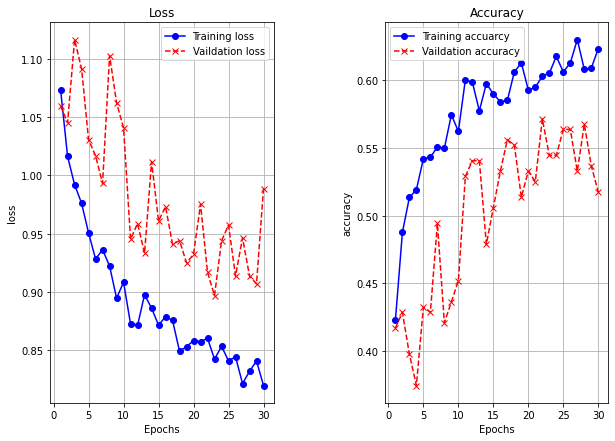

In [11]:
import matplotlib.pyplot as plt

loss = hist.history['loss']
acc = hist.history['accuracy']

val_loss = hist.history['val_loss']
val_acc = hist.history['val_accuracy']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(10,7))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rx--', label='Vaildation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo-', label='Training accuarcy')
plt.plot(epochs, val_acc, 'rx--', label='Vaildation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.grid()
plt.legend()

In [12]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import numpy as np

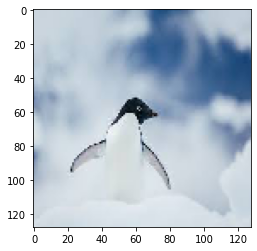

numpy array size :  (128, 128, 3)
1/1 [==============================] - 1s 1s/step
결과 :  king penguin


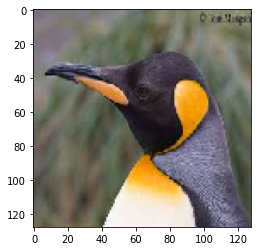

numpy array size :  (128, 128, 3)
1/1 [==============================] - 0s 47ms/step
결과 :  king penguin


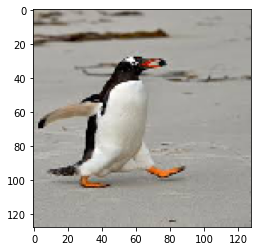

numpy array size :  (128, 128, 3)
1/1 [==============================] - 0s 37ms/step
결과 :  gentoo penguin


In [13]:
img_height = 128
img_width = 128

filename = ['/Users/bh/kears/iamge/test/adélie penguin/adélie_penguin_106.jpg','/Users/bh/kears/iamge/test/king penguin/king penguin44.jpg','/Users/bh/kears/iamge/test/gentoo penguin/gentoo_penguin_45.jpg']

predict_dictionary = {0:'adelie penguin',1:'king penguin',2: 'gentoo penguin'}

for file in filename:
    original = load_img(file, target_size = (img_height,img_width))

    numpy_image = img_to_array(original)
    plt.imshow(np.uint8(numpy_image))
    plt.show()
    print("numpy array size : ", numpy_image.shape)
    image_batch = np.expand_dims(numpy_image , axis = 0)

    predict = np.argmax(model.predict(image_batch/128.))

    print('결과 : ',predict_dictionary[predict])

In [14]:
#model.save_weights('/Users/bh/kears/pretrain3/weight')

In [15]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./128)
test_dir = '/Users/bh/kears/iamge/test'
test_Gen = test_datagen.flow_from_directory(test_dir, batch_size = 32)
loss, accuracy = model.evaluate(test_Gen,
                                steps = test_Gen.samples/test_Gen.batch_size)

print('Loss = {:.5f}'.format(loss))
print('Acc - {:.5f}'.format(accuracy))

Found 326 images belonging to 3 classes.
10/10 [==============================] - 4s 437ms/step - loss: 0.9202 - accuracy: 0.5613
Loss = 0.92019
Acc - 0.56135


In [16]:
#### 얼린 레이어를 줄여주며 한번 더 학습

In [17]:
model.trainable= True ## 모델에 얼린 레이어을 모두 학습가능한 레이어로 바꾸어준다.

In [18]:
## 출력부(레이어의 bottom)쪽의 120 레이어를 얼려준다.
fine_tune_at = 120

# Freeze all the layers before the `fine_tune_at` layer
for layer in resnet50.layers[:fine_tune_at]:
  layer.trainable = False

In [19]:
model.compile(optimizer=optimizers.legacy.Adam(learning_rate=0.00001),loss='categorical_crossentropy',metrics='accuracy')
##학습률을 1/10으로 변경

In [20]:
fine_tune_epochs = 30
total_epochs =  30 + fine_tune_epochs

history_fine = model.fit(image_data_train,
                         batch_size=32,
                         epochs=total_epochs,
                         initial_epoch=30,
                         validation_data=(image_data_test),
                         validation_steps =image_data_test.samples/image_data_test.batch_size)



Epoch 31/60
33/33 [==============================] - 31s 872ms/step - loss: 1.0687 - accuracy: 0.4512 - val_loss: 1.0488 - val_accuracy: 0.4170
Epoch 32/60
33/33 [==============================] - 28s 840ms/step - loss: 0.9658 - accuracy: 0.5019 - val_loss: 1.1080 - val_accuracy: 0.3861
Epoch 33/60
33/33 [==============================] - 28s 859ms/step - loss: 0.9285 - accuracy: 0.5497 - val_loss: 1.1389 - val_accuracy: 0.4247
Epoch 34/60
33/33 [==============================] - 27s 815ms/step - loss: 0.8946 - accuracy: 0.5870 - val_loss: 1.1099 - val_accuracy: 0.4363
Epoch 35/60
33/33 [==============================] - 28s 837ms/step - loss: 0.8530 - accuracy: 0.5860 - val_loss: 1.0448 - val_accuracy: 0.5328
Epoch 36/60
33/33 [==============================] - 27s 822ms/step - loss: 0.8534 - accuracy: 0.5927 - val_loss: 1.0643 - val_accuracy: 0.4788
Epoch 37/60
33/33 [==============================] - 28s 844ms/step - loss: 0.8225 - accuracy: 0.6128 - val_loss: 1.0105 - val_accuracy:

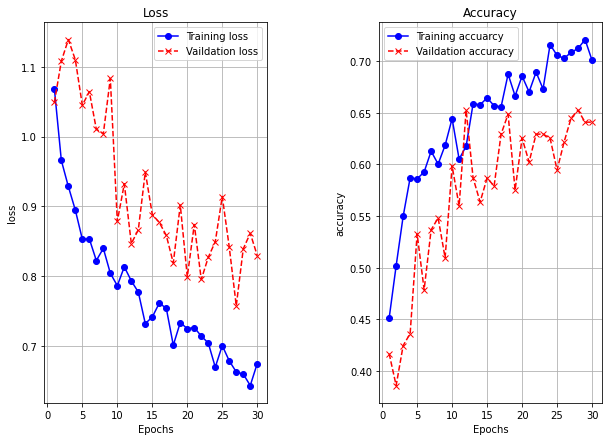

In [21]:
loss = history_fine.history['loss']
acc = history_fine.history['accuracy']

val_loss = history_fine.history['val_loss']
val_acc = history_fine.history['val_accuracy']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(10,7))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rx--', label='Vaildation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo-', label='Training accuarcy')
plt.plot(epochs, val_acc, 'rx--', label='Vaildation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.grid()
plt.legend()

In [22]:
model.save_weights('/Users/bh/kears/pretrain4/weight') ## 모델 가중치 저장